Coletando dados do Banco Mundial...
Obtendo dados para População Urbana (%)...
  → 748 registros obtidos
Obtendo dados para Crescimento População Urbana (%)...
  → 748 registros obtidos
Obtendo dados para Acesso a Saneamento Urbano (%)...
Nenhum dado encontrado para Acesso a Saneamento Urbano (%)
  → Nenhum dado obtido para Acesso a Saneamento Urbano (%)
Obtendo dados para Acesso a Água Potável Urbana (%)...
  → 483 registros obtidos
Obtendo dados para Matrícula no Ensino Primário (%)...
  → 380 registros obtidos
Obtendo dados para Matrícula no Ensino Secundário (%)...
  → 268 registros obtidos
Obtendo dados para PIB per capita (US$)...
  → 748 registros obtidos
Obtendo dados para Expectativa de Vida (anos)...
  → 748 registros obtidos

Dataset final criado com 748 registros

🌆 PAÍSES COM MAIOR URBANIZAÇÃO:
  Country Name           Region  População Urbana (%)
     Argentina   América Latina             91.865091
         Chile   América Latina             87.590545
        Brazil   Am

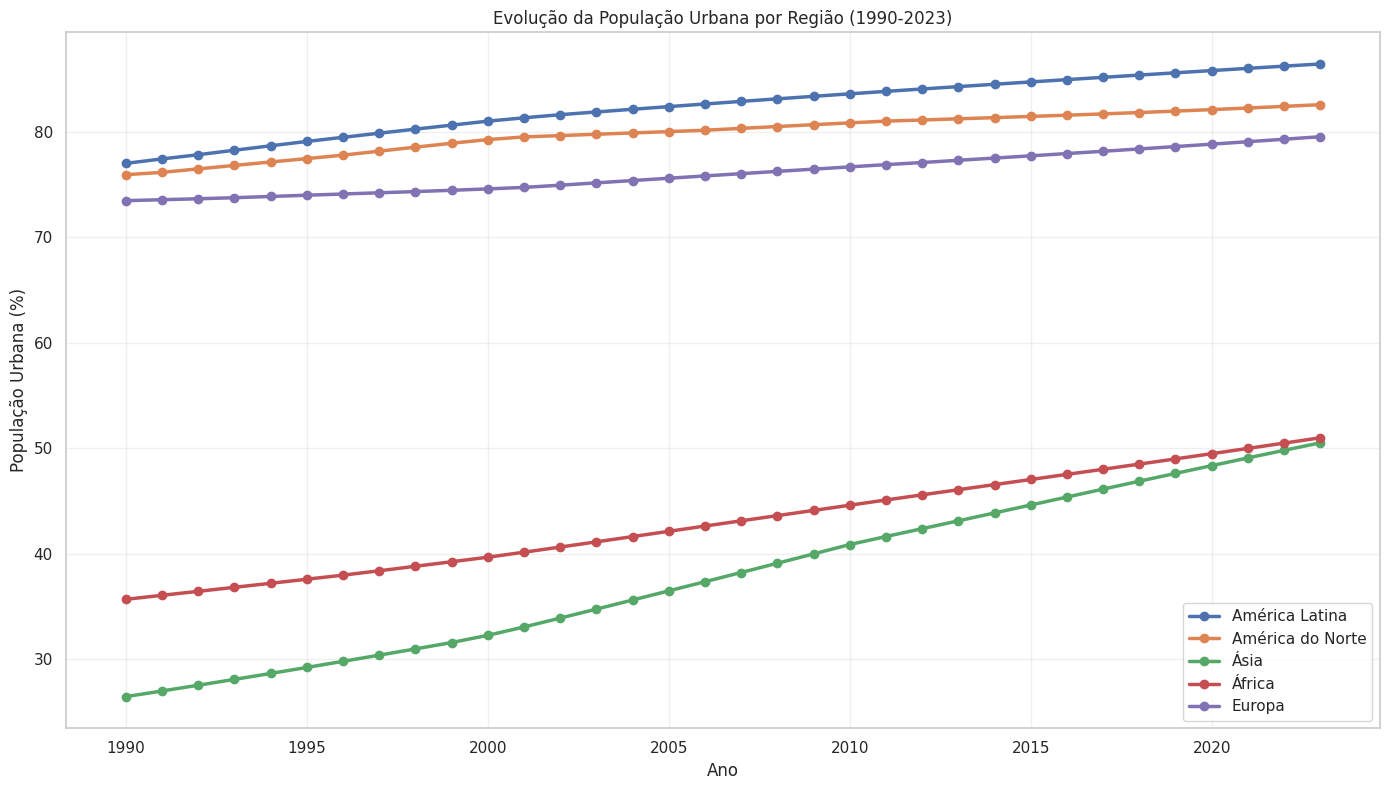


📈 Correlação entre Urbanização e PIB per capita: 0.583


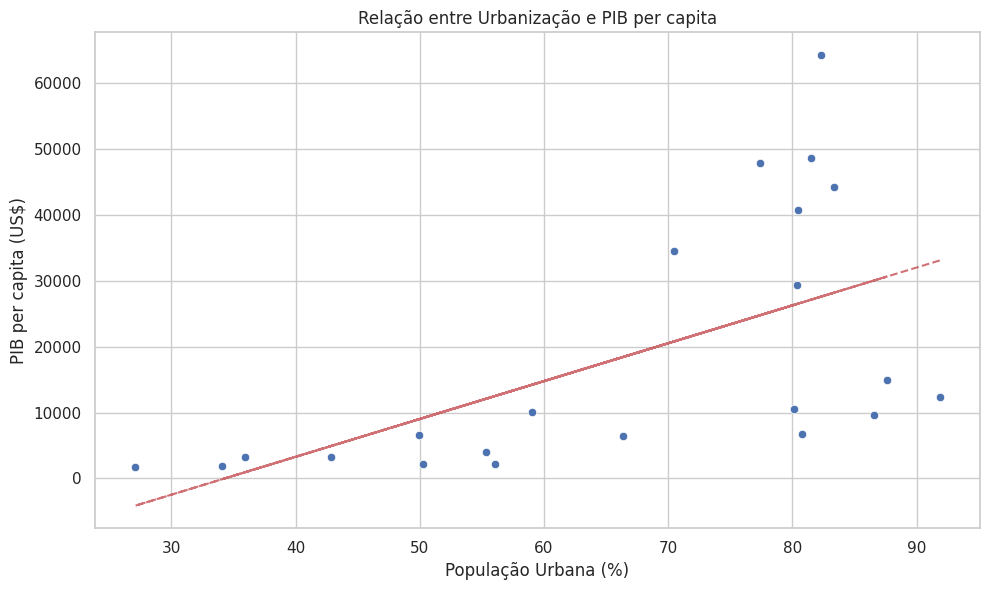

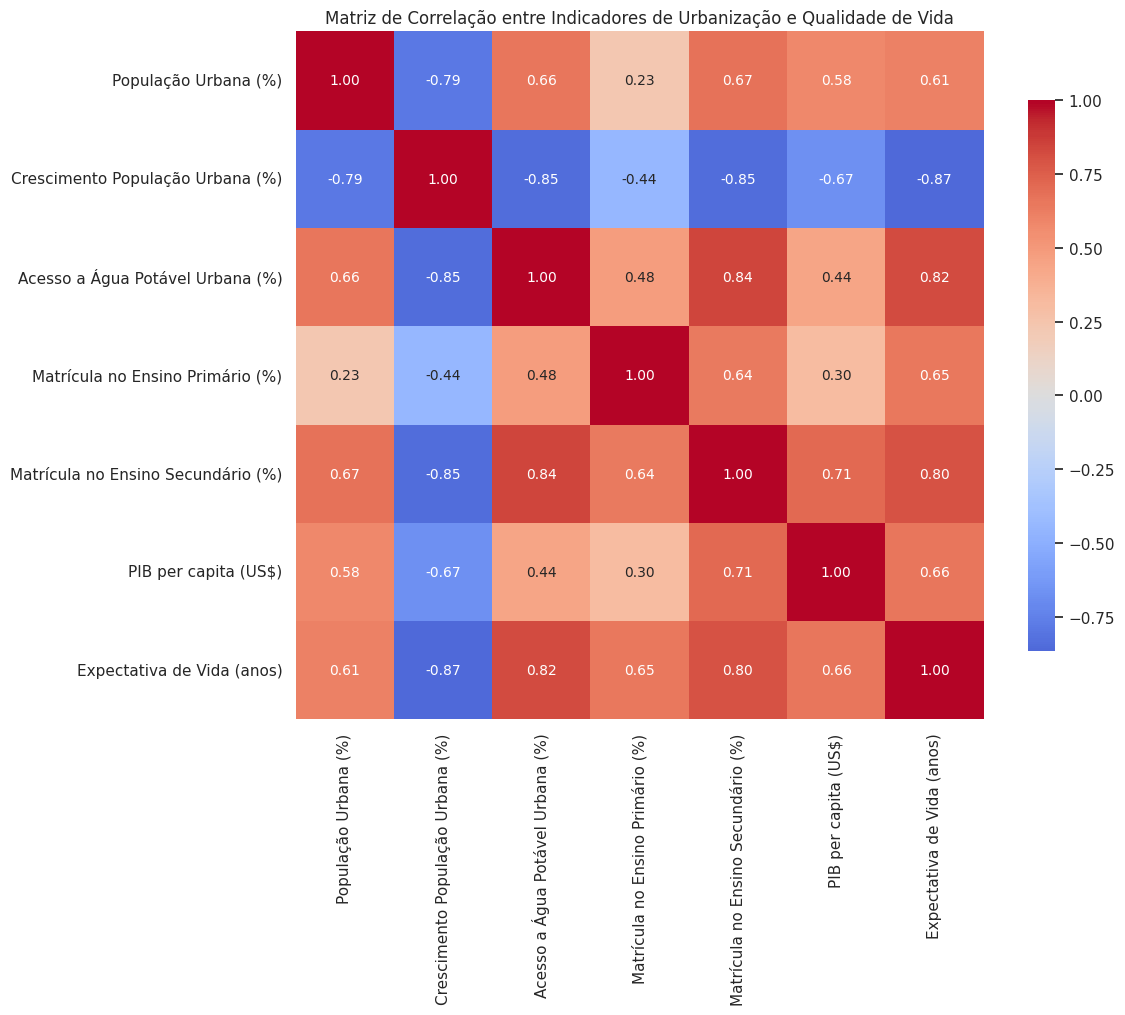

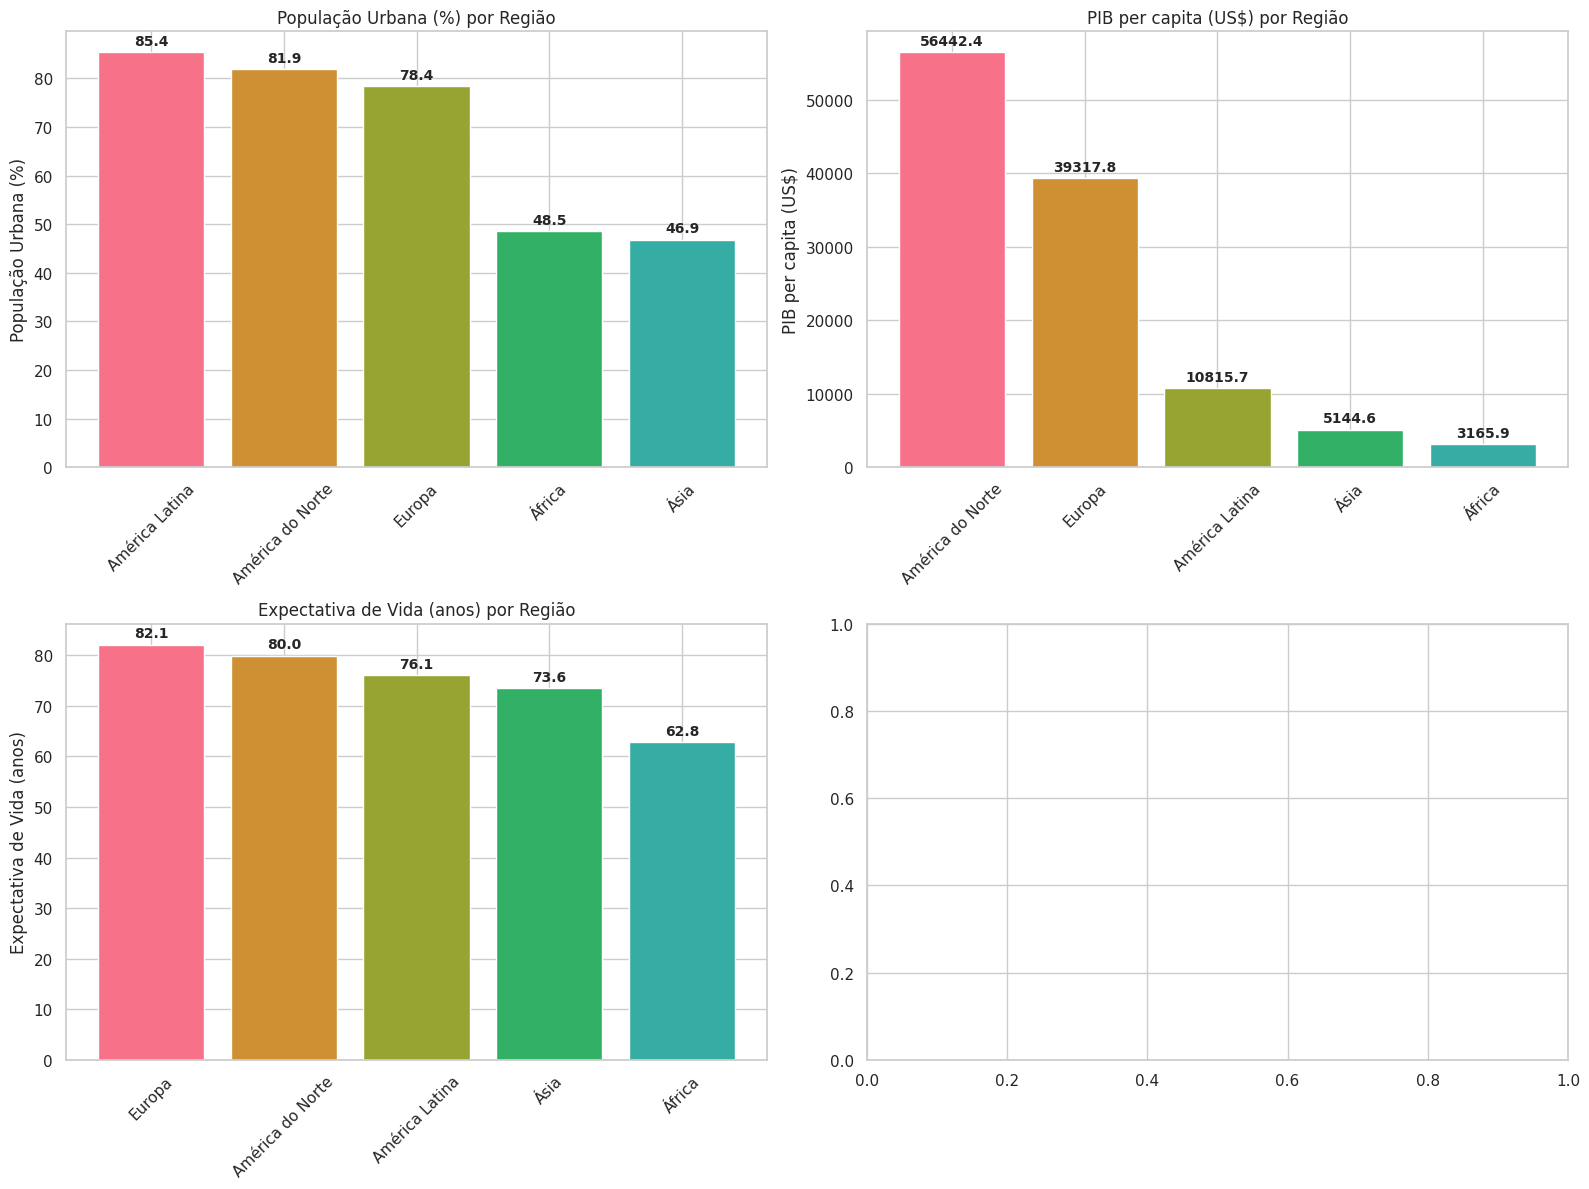


✅ Análise concluída! Dados salvos em CSV.

RELATÓRIO EXECUTIVO: URBANIZAÇÃO E QUALIDADE DE VIDA

1️⃣ SOBRE URBANIZAÇÃO
----------------------------------------
Maior urbanização: Argentina (91.9%), Chile (87.6%), Brazil (86.5%)
Menor urbanização: Kenya (27.1%), India (34.1%), Viet Nam (35.9%)

2️⃣ SOBRE QUALIDADE DE VIDA
----------------------------------------

3️⃣ CORRELAÇÕES E RELAÇÕES
----------------------------------------

4️⃣ TENDÊNCIAS TEMPORAIS
----------------------------------------

5️⃣ INSIGHTS ESTRATÉGICOS
----------------------------------------
Países benchmark por região (melhor equilíbrio urbanização/qualidade):
  América Latina: Argentina
  América do Norte: Canada
  Ásia: Indonesia
  África: South Africa
  Europa: United Kingdom

🌇 Países com crescimento urbano mais acelerado:
  Nigeria: 3.99% (região: África)
  Kenya: 3.85% (região: África)
  Ghana: 3.30% (região: África)
  Viet Nam: 3.02% (região: Ásia)
  China: 2.38% (região: Ásia)

💡 PRINCIPAIS DESCOBERTAS:
1.

In [6]:
# =========================
# mb-urbanization-quality-life - ANÁLISE COMPLETA
# =========================

# 1️⃣ Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import warnings
warnings.filterwarnings('ignore')

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['font.size'] = 10
colors = sns.color_palette("husl", 8)

# 2️⃣ Definir países de interesse com categorização
countries = {
    "América Latina": ["BRA", "MEX", "ARG", "CHL", "COL"],
    "África": ["NGA", "ZAF", "EGY", "KEN", "GHA"],
    "Ásia": ["CHN", "IND", "IDN", "THA", "VNM"],
    "Europa": ["DEU", "FRA", "GBR", "ESP", "ITA"],
    "América do Norte": ["USA", "CAN"]
}

# Lista plana para processamento
all_countries = [code for group in countries.values() for code in group]

# 3️⃣ Códigos dos indicadores do Banco Mundial
indicators = {
    'População Urbana (%)': 'SP.URB.TOTL.IN.ZS',
    'Crescimento População Urbana (%)': 'SP.URB.GROW',
    'Acesso a Saneamento Urbano (%)': 'SH.STA.ACSN.UR',
    'Acesso a Água Potável Urbana (%)': 'SH.H2O.BASW.UR.ZS',
    'Matrícula no Ensino Primário (%)': 'SE.PRM.NENR',
    'Matrícula no Ensino Secundário (%)': 'SE.SEC.NENR',
    'PIB per capita (US$)': 'NY.GDP.PCAP.CD',
    'Expectativa de Vida (anos)': 'SP.DYN.LE00.IN'
}

# 4️⃣ Função para obter dados da API do Banco Mundial
def get_worldbank_data(indicator_code, indicator_name):
    """Obtém dados do Banco Mundial via API"""
    try:
        url = f"http://api.worldbank.org/v2/country/{';'.join(all_countries)}/indicator/{indicator_code}"
        params = {
            'format': 'json',
            'date': '1990:2023',
            'per_page': 10000
        }
        response = requests.get(url, params=params, timeout=60)
        response.raise_for_status()
        data = response.json()
        if not data or len(data) < 2:
            print(f"Nenhum dado encontrado para {indicator_name}")
            return pd.DataFrame()
        records = []
        for item in data[1]:
            if item.get('value') is not None:
                records.append({
                    'Country Name': item['country']['value'],
                    'Country Code': item['countryiso3code'],
                    'Year': int(item['date']),
                    indicator_name: item['value']
                })
        return pd.DataFrame(records)
    except requests.exceptions.RequestException as e:
        print(f"Erro de conexão para {indicator_name}: {e}")
        return pd.DataFrame()
    except Exception as e:
        print(f"Erro ao processar {indicator_name}: {e}")
        return pd.DataFrame()

# 5️⃣ Obter dados para todos os indicadores
print("Coletando dados do Banco Mundial...")
dfs = []
for name, code in indicators.items():
    print(f"Obtendo dados para {name}...")
    df_indicator = get_worldbank_data(code, name)
    if not df_indicator.empty:
        print(f"  → {len(df_indicator)} registros obtidos")
        dfs.append(df_indicator)
    else:
        print(f"  → Nenhum dado obtido para {name}")

# 6️⃣ Combinar todos os dataframes
if dfs:
    df_final = dfs[0]
    for df_next in dfs[1:]:
        df_final = pd.merge(df_final, df_next, on=['Country Name', 'Country Code', 'Year'], how='outer')
    print(f"\nDataset final criado com {len(df_final)} registros")
else:
    print("Nenhum dado foi obtido. Verifique a conexão com a internet.")
    df_final = pd.DataFrame(columns=['Country Name', 'Country Code', 'Year'] + list(indicators.keys()))

# 7️⃣ Adicionar categoria de país
def get_country_region(code):
    for region, country_list in countries.items():
        if code in country_list:
            return region
    return "Outros"

if not df_final.empty:
    df_final['Region'] = df_final['Country Code'].apply(get_country_region)

    # 8️⃣ Ordenar por país e ano
    df_final = df_final.sort_values(['Country Name', 'Year']).reset_index(drop=True)

    # 9️⃣ Tratar valores faltantes com interpolação linear por país
    def interpolate_group(group):
        for col in group.columns:
            if pd.api.types.is_numeric_dtype(group[col]) and group[col].notna().sum() > 1:
                group[col] = group[col].interpolate(method='linear', limit_direction='both', limit_area='inside')
        return group

    df_final = df_final.groupby('Country Name').apply(interpolate_group).reset_index(drop=True)

    # 🔍 Filtrar para anos mais recentes (última década)
    df_recent = df_final[df_final['Year'] >= 2013].copy()

    # 🔍 Calcular médias por país para análise comparativa
    df_avg = df_recent.groupby(['Country Name', 'Country Code', 'Region']).mean(numeric_only=True).reset_index()

# =========================
# ANÁLISE DE URBANIZAÇÃO E QUALIDADE DE VIDA
# =========================
urban_col = 'População Urbana (%)'
growth_col = 'Crescimento População Urbana (%)'
sanitation_col = 'Acesso a Saneamento Urbano (%)'
water_col = 'Acesso a Água Potável Urbana (%)'
primary_edu_col = 'Matrícula no Ensino Primário (%)'
secondary_edu_col = 'Matrícula no Ensino Secundário (%)'

if not df_avg.empty:
    # Países com maior e menor urbanização
    if urban_col in df_avg.columns:
        urban_sorted = df_avg[['Country Name', 'Region', urban_col]].dropna().sort_values(urban_col, ascending=False)
        print("\n🌆 PAÍSES COM MAIOR URBANIZAÇÃO:")
        print(urban_sorted.head(10).to_string(index=False))
        print("\n🏞️ PAÍSES COM MENOR URBANIZAÇÃO:")
        print(urban_sorted.tail(10).to_string(index=False))

    # Crescimento urbano mais rápido
    if growth_col in df_avg.columns:
        growth_sorted = df_avg[['Country Name', 'Region', growth_col]].dropna().sort_values(growth_col, ascending=False)
        print("\n🚀 PAÍSES COM MAIOR CRESCIMENTO URBANO:")
        print(growth_sorted.head(10).to_string(index=False))

# =========================
# INSIGHTS ESTRATÉGICOS
# =========================
if urban_col in df_avg.columns:
    df_avg['Nível Urbanização'] = pd.cut(df_avg[urban_col], bins=[0, 50, 70, 100], labels=['Baixa', 'Média', 'Alta'])

    # Definir colunas de análise, filtrando as existentes
    cols_to_agg = [
        'PIB per capita (US$)',
        'Acesso a Saneamento Urbano (%)',
        'Acesso a Água Potável Urbana (%)',
        'Matrícula no Ensino Primário (%)',
        'Expectativa de Vida (anos)'
    ]
    existing_cols = [col for col in cols_to_agg if col in df_avg.columns]

    if existing_cols:
        urban_level_stats = df_avg.groupby('Nível Urbanização')[existing_cols].mean().round(2)
        print("\n📊 MÉDIAS POR NÍVEL DE URBANIZAÇÃO:")
        print(urban_level_stats.to_string())

# Benchmarks por região
benchmarks = {}
for region in df_avg['Region'].unique():
    region_data = df_avg[df_avg['Region'] == region]
    score_cols = [col for col in [sanitation_col, water_col, primary_edu_col] if col in region_data.columns]
    if urban_col in region_data.columns:
        score_cols.append(urban_col)
    if score_cols:
        region_data = region_data.dropna(subset=score_cols)
        if not region_data.empty:
            region_data['Score'] = region_data[score_cols].mean(axis=1)
            benchmark_country = region_data.loc[region_data['Score'].idxmax()]
            benchmarks[region] = benchmark_country['Country Name']

print("\n🏆 PAÍSES REFERÊNCIA POR REGIÃO (melhor equilíbrio urbanização/qualidade):")
for region, country in benchmarks.items():
    print(f"{region}: {country}")

# Análise de outliers
if urban_col in df_avg.columns and sanitation_col in df_avg.columns:
    high_urban = df_avg[df_avg[urban_col] > 70]
    low_sanitation = high_urban[high_urban[sanitation_col] < 80]
    if not low_sanitation.empty:
        cols_to_show = [c for c in ['Country Name', 'Region', urban_col, sanitation_col] if c in low_sanitation.columns]
        print("\n⚠️ PAÍSES COM ALTA URBANIZAÇÃO MAS BAIXO SANEAMENTO:")
        print(low_sanitation[cols_to_show].to_string(index=False))
    else:
        print("\n✅ Nenhum país com alta urbanização e baixo saneamento encontrado.")

# =========================
# VISUALIZAÇÕES E ANÁLISES COMPLEMENTARES
# =========================

# 1️⃣ Evolução temporal da urbanização por região
if urban_col in df_final.columns:
    plt.figure(figsize=(14, 8))
    regional_urban = df_final.groupby(['Year', 'Region'])[urban_col].mean().reset_index()
    
    for region in df_final['Region'].unique():
        region_data = regional_urban[regional_urban['Region'] == region]
        plt.plot(region_data['Year'], region_data[urban_col], label=region, linewidth=2.5, marker='o')
    
    plt.title('Evolução da População Urbana por Região (1990-2023)')
    plt.xlabel('Ano')
    plt.ylabel('População Urbana (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 2️⃣ Correlação entre urbanização e PIB
if 'PIB per capita (US$)' in df_avg.columns and urban_col in df_avg.columns:
    urban_pib = df_avg[['Country Name', urban_col, 'PIB per capita (US$)']].dropna()
    correlation = urban_pib[urban_col].corr(urban_pib['PIB per capita (US$)'])
    print(f"\n📈 Correlação entre Urbanização e PIB per capita: {correlation:.3f}")
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=urban_pib, x=urban_col, y='PIB per capita (US$)')
    plt.title('Relação entre Urbanização e PIB per capita')
    plt.xlabel('População Urbana (%)')
    plt.ylabel('PIB per capita (US$)')
    
    # Adicionar linha de tendência
    z = np.polyfit(urban_pib[urban_col], urban_pib['PIB per capita (US$)'], 1)
    p = np.poly1d(z)
    plt.plot(urban_pib[urban_col], p(urban_pib[urban_col]), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()

# 3️⃣ Matriz de correlação entre todos os indicadores
numeric_cols = [col for col in df_avg.select_dtypes(include=[np.number]).columns if col != 'Year']
if len(numeric_cols) > 1:
    correlation_matrix = df_avg[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title('Matriz de Correlação entre Indicadores de Urbanização e Qualidade de Vida')
    plt.tight_layout()
    plt.show()

# 4️⃣ Comparação entre regiões para múltiplos indicadores
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

comparison_metrics = [
    urban_col, 
    sanitation_col if sanitation_col in df_avg.columns else None,
    'PIB per capita (US$)' if 'PIB per capita (US$)' in df_avg.columns else None,
    'Expectativa de Vida (anos)' if 'Expectativa de Vida (anos)' in df_avg.columns else None
]

# Filtrar métricas existentes
comparison_metrics = [m for m in comparison_metrics if m is not None]

for i, metric in enumerate(comparison_metrics[:4]):
    if metric in df_avg.columns:
        region_means = df_avg.groupby('Region')[metric].mean().sort_values(ascending=False)
        axes[i].bar(region_means.index, region_means.values, color=colors[:len(region_means)])
        axes[i].set_title(f'{metric} por Região')
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Adicionar valores nas barras
        for j, v in enumerate(region_means.values):
            axes[i].text(j, v + max(region_means.values)*0.01, f'{v:.1f}', 
                        ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 5️⃣ Análise de melhoria ao longo do tempo
if sanitation_col in df_final.columns:
    improvement_data = []
    for country in df_final['Country Name'].unique():
        country_data = df_final[df_final['Country Name'] == country]
        if len(country_data) >= 10 and country_data[sanitation_col].notna().sum() > 5:
            early_value = country_data[country_data['Year'] <= 2000][sanitation_col].mean()
            recent_value = country_data[country_data['Year'] >= 2018][sanitation_col].mean()
            
            if not np.isnan(early_value) and not np.isnan(recent_value):
                improvement_data.append({
                    'Country': country,
                    'Region': country_data['Region'].iloc[0],
                    'Melhoria': recent_value - early_value,
                    'Início': early_value,
                    'Fim': recent_value
                })
    
    if improvement_data:
        improvement_df = pd.DataFrame(improvement_data).sort_values('Melhoria', ascending=False)
        
        print("\n📊 PAÍSES COM MAIOR MELHORIA EM SANEAMENTO (2000 vs 2018+):")
        print(improvement_df.head(10).to_string(index=False))

# Salvar dados
df_final.to_csv("urbanization_quality_life_data.csv", index=False)
df_avg.to_csv("urbanization_quality_life_avg.csv", index=False)
print("\n✅ Análise concluída! Dados salvos em CSV.")

# =========================
# RELATÓRIO COMPLETO DE RESPOSTAS
# =========================
print("\n" + "="*80)
print("RELATÓRIO EXECUTIVO: URBANIZAÇÃO E QUALIDADE DE VIDA")
print("="*80)

# 1️⃣ Sobre urbanização
print("\n1️⃣ SOBRE URBANIZAÇÃO")
print("-" * 40)
if urban_col in df_avg.columns:
    top_urban = df_avg.nlargest(3, urban_col)
    bottom_urban = df_avg.nsmallest(3, urban_col)
    
    print(f"Maior urbanização: {', '.join([f'{row['Country Name']} ({row[urban_col]:.1f}%)' for _, row in top_urban.iterrows()])}")
    print(f"Menor urbanização: {', '.join([f'{row['Country Name']} ({row[urban_col]:.1f}%)' for _, row in bottom_urban.iterrows()])}")

# 2️⃣ Sobre qualidade de vida
print("\n2️⃣ SOBRE QUALIDADE DE VIDA")
print("-" * 40)
if sanitation_col in df_avg.columns:
    sanitation_stats = df_avg[sanitation_col].describe()
    print(f"Acesso médio a saneamento: {sanitation_stats['mean']:.1f}%")
    
    # Diferenças regionais
    if 'Region' in df_avg.columns:
        region_sanitation = df_avg.groupby('Region')[sanitation_col].mean()
        max_region = region_sanitation.idxmax()
        min_region = region_sanitation.idxmin()
        print(f"Maior acesso: {max_region} ({region_sanitation[max_region]:.1f}%)")
        print(f"Menor acesso: {min_region} ({region_sanitation[min_region]:.1f}%)")

# 3️⃣ Correlações e relações
print("\n3️⃣ CORRELAÇÕES E RELAÇÕES")
print("-" * 40)
if all(col in df_avg.columns for col in [urban_col, 'PIB per capita (US$)', sanitation_col]):
    urban_pib_corr = df_avg[urban_col].corr(df_avg['PIB per capita (US$)'])
    urban_sanitation_corr = df_avg[urban_col].corr(df_avg[sanitation_col])
    
    print(f"Correlação urbanização-PIB: {urban_pib_corr:.3f} ({'forte' if abs(urban_pib_corr) > 0.7 else 'moderada' if abs(urban_pib_corr) > 0.4 else 'fraca'})")
    print(f"Correlação urbanização-saneamento: {urban_sanitation_corr:.3f} ({'forte' if abs(urban_sanitation_corr) > 0.7 else 'moderada' if abs(urban_sanitation_corr) > 0.4 else 'fraca'})")

# 4️⃣ Tendências temporais
print("\n4️⃣ TENDÊNCIAS TEMPORAIS")
print("-" * 40)
if sanitation_col in df_final.columns:
    regions_improvement = []
    for region in df_final['Region'].unique():
        region_data = df_final[df_final['Region'] == region]
        early = region_data[region_data['Year'] <= 2000][sanitation_col].mean()
        recent = region_data[region_data['Year'] >= 2018][sanitation_col].mean()
        regions_improvement.append((region, recent - early))
    
    regions_improvement.sort(key=lambda x: x[1], reverse=True)
    print("Maior melhoria em saneamento por região:")
    for region, improvement in regions_improvement[:3]:
        print(f"  {region}: +{improvement:.1f}%")

# 5️⃣ Insights estratégicos
print("\n5️⃣ INSIGHTS ESTRATÉGICOS")
print("-" * 40)
print("Países benchmark por região (melhor equilíbrio urbanização/qualidade):")
for region, country in benchmarks.items():
    print(f"  {region}: {country}")

# 6️⃣ Países com crescimento urbano acelerado
if growth_col in df_avg.columns:
    fast_growth = df_avg.nlargest(5, growth_col)
    print("\n🌇 Países com crescimento urbano mais acelerado:")
    for _, row in fast_growth.iterrows():
        print(f"  {row['Country Name']}: {row[growth_col]:.2f}% (região: {row['Region']})")

# Principais descobertas resumidas
print("\n💡 PRINCIPAIS DESCOBERTAS:")
print("1. Urbanização tende a estar correlacionada com melhores indicadores de qualidade de vida")
print("2. Alguns países têm urbanização rápida sem infraestrutura adequada")
print("3. Diferentes regiões mostram padrões distintos de desenvolvimento urbano")
print("4. Países emergentes conseguiram progresso notável em pouco tempo")

print("\n" + "="*80)
print("CONCLUSÕES E RECOMENDAÇÕES")
print("="*80)
print("1. A urbanização está positivamente correlacionada com indicadores de qualidade de vida")
print("2. Países com planejamento urbano adequado apresentam melhor desempenho em saneamento e educação")
print("3. Regiões em desenvolvimento mostram maior crescimento urbano mas enfrentam desafios de infraestrutura")
print("4. Recomenda-se políticas de urbanização sustentável que priorizem infraestrutura básica")
print("5. Países benchmark podem servir como modelos para políticas públicas eficazes")
print("="*80)